In [1]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
uniform_horizon_dir = "../outputs/lift_lowdim_ph_reproduction/2025.04.26_17.15.57_train_diffusion_unet_lowdim_lift_lowdim_cnn_32/uniform_horizon_jumping_disturbance"

In [3]:
uniform_horizon_success_rate_lst = list()
for horizon in range(2, 31):
    py_data = json.load(open(os.path.join(uniform_horizon_dir, f"eval_jumping_disturbance_num_distrub_1_pos_0.03_gripper_dir_near_gripper_0.025_200episodes_max_steps_70_horizon_{horizon}", "eval_log.json")))
    uniform_horizon_success_rate_lst.append([horizon, py_data["test/mean_score"]])
uniform_horizon_success_rate_lst = np.array(uniform_horizon_success_rate_lst)

In [4]:
# uniform_horizon_dir = "../data/outputs/lift_lowdim_ph_reproduction/horizon_16/2025.03.11/10.57.22_train_diffusion_unet_lowdim_lift_lowdim_transformer_128/uniform_horizon_jumpying_disturbance"

# uniform_horizon_dir_1 = "../data/outputs/lift_lowdim_ph_reproduction/horizon_16/2025.03.11/10.57.22_train_diffusion_unet_lowdim_lift_lowdim_transformer_128/uniform_horizon_jumpying_disturbance_1"

# uniform_horizon_dir_2 = "../data/outputs/lift_lowdim_ph_reproduction/horizon_16/2025.03.11/10.57.22_train_diffusion_unet_lowdim_lift_lowdim_transformer_128/uniform_horizon_jumpying_disturbance_2"


In [5]:
# success_rate_lst = list()
# for horizon in range(1, 14):
#     py_data = json.load(open(os.path.join(uniform_horizon_dir, f"eval_jumping_disturbance_horizon_{horizon}_num_distrub_1_pos_0.03_gripper_dir_near_gripper_0.025_50episodes", "eval_log.json")))
    
#     py_data_1 = json.load(open(os.path.join(uniform_horizon_dir_1, f"eval_jumping_disturbance_horizon_{horizon}_num_distrub_1_pos_0.03_gripper_dir_near_gripper_0.025_50episodes", "eval_log.json")))
    
#     py_data_2 = json.load(open(os.path.join(uniform_horizon_dir_2, f"eval_jumping_disturbance_horizon_{horizon}_num_distrub_1_pos_0.03_gripper_dir_near_gripper_0.025_50episodes", "eval_log.json")))
#     success_rate_lst.append((py_data["test/mean_score"] + py_data_1["test/mean_score"] + py_data_2["test/mean_score"]*2) / 4)
# success_rate_lst = np.array(success_rate_lst)

In [6]:
# success_rate_lst = list()
# for horizon in range(1, 13):
#     # py_data = json.load(open(os.path.join(uniform_horizon_dir, f"eval_jumping_disturbance_horizon_{horizon}_num_distrub_1_pos_0.03_gripper_dir_near_gripper_0.025_50episodes", "eval_log.json")))
    
#     py_data_1 = json.load(open(os.path.join(uniform_horizon_dir_1, f"eval_jumping_disturbance_horizon_{horizon}_num_distrub_1_pos_0.03_gripper_dir_near_gripper_0.025_50episodes", "eval_log.json")))
#     success_rate_lst.append((py_data_1["test/mean_score"]))
# success_rate_lst = np.array(success_rate_lst)

In [7]:
print(uniform_horizon_success_rate_lst)

[[ 2.     0.83 ]
 [ 3.     0.855]
 [ 4.     0.755]
 [ 5.     0.715]
 [ 6.     0.695]
 [ 7.     0.7  ]
 [ 8.     0.665]
 [ 9.     0.565]
 [10.     0.51 ]
 [11.     0.54 ]
 [12.     0.465]
 [13.     0.415]
 [14.     0.4  ]
 [15.     0.365]
 [16.     0.39 ]
 [17.     0.48 ]
 [18.     0.425]
 [19.     0.44 ]
 [20.     0.285]
 [21.     0.28 ]
 [22.     0.275]
 [23.     0.225]
 [24.     0.19 ]
 [25.     0.16 ]
 [26.     0.24 ]
 [27.     0.25 ]
 [28.     0.31 ]
 [29.     0.33 ]
 [30.     0.36 ]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


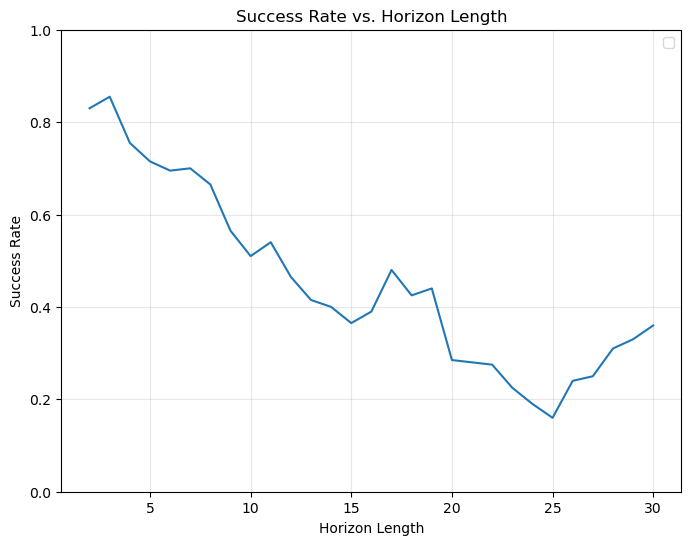

In [8]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(uniform_horizon_success_rate_lst[:, 0], uniform_horizon_success_rate_lst[:, 1])
ax1.set_ylim(.0, 1)
ax1.set_xlabel('Horizon Length')
ax1.set_ylabel('Success Rate')
ax1.set_title('Success Rate vs. Horizon Length')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.show()

In [15]:
seed_lst = np.concatenate([np.arange(100000, 100100), np.arange(100100, 100200)])

In [16]:
# Calculate averages and std for each bin
def get_binned_statistics(horizon_times, success, bins):
    bin_indices = np.digitize(horizon_times, bins)
    binned_success_rate = []
    bin_centers = []
    bin_counts = []
    for i in range(min(bin_indices), max(bin_indices)+1):
        mask = bin_indices == i
        if np.any(np.logical_and(mask, success)):
            bin_centers.append((bins[i-1] + bins[i]) / 2)
            binned_success_rate.append(np.mean(success[mask]))
            bin_counts.append(np.sum(mask))
        else:
            binned_success_rate.append(0)
            bin_counts.append(0)
            bin_centers.append((bins[i-1] + bins[i]) / 2)
    
    return np.array(bin_centers), np.array(binned_success_rate), bin_counts

In [17]:
AHC_horizon_dir = "../outputs/lift_lowdim_ph_reproduction/2025.04.26_17.15.57_train_diffusion_unet_lowdim_lift_lowdim_cnn_32/eval_AHC_disturbance_by_seed"
AHC_horizon_success_rate_lst = list()
for seed in seed_lst:
    for horizon in range(2, 31):
        py_data = json.load(open(os.path.join(AHC_horizon_dir, f"eval_AHC_seed_{seed}_jumping_disturbance_num_distrub_1_pos_0.03_gripper_dir_near_gripper_0.025", "eval_log.json")))
        
        if py_data[f"test/sim_action_horizon_average_length_{horizon}"] > -1:
            AHC_horizon_success_rate_lst.append(
                np.array([
                    py_data[f"test/sim_action_horizon_average_length_{horizon}"],
                    py_data[f"test/sim_max_reward_{horizon}"]
                ])
            )
AHC_horizon_success_rate_lst = np.array(AHC_horizon_success_rate_lst)
print(AHC_horizon_success_rate_lst.shape)


(5504, 2)


In [18]:
bins = np.arange(0.5, 31.5, 1)
print(bins)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5]


In [19]:
AHC_bin_centers, AHC_binned_success_rate, AHC_bin_counts = get_binned_statistics(AHC_horizon_success_rate_lst[:, 0], AHC_horizon_success_rate_lst[:, 1], bins)

In [20]:
len(AHC_bin_centers)

29

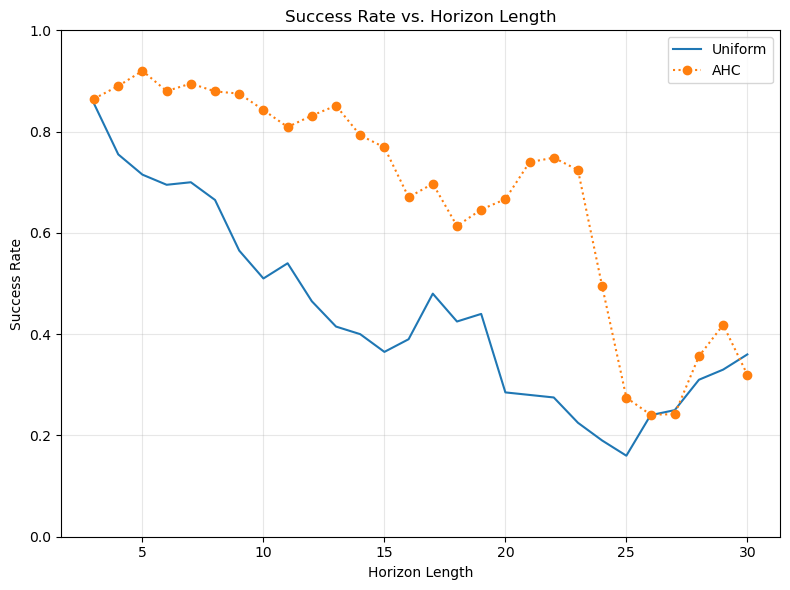

In [21]:
fig, ax1 = plt.subplots(figsize=(8, 6))
# chunk = np.arange(0, 12)
chunk = np.arange(1, 29)
ax1.plot(uniform_horizon_success_rate_lst[chunk, 0], uniform_horizon_success_rate_lst[chunk, 1], color='tab:blue', label='Uniform')
ax1.plot(AHC_bin_centers[chunk], AHC_binned_success_rate[chunk], 'o:', color='tab:orange', label='AHC')
ax1.set_ylim(.0, 1)
ax1.set_xlabel('Horizon Length')
ax1.set_ylabel('Success Rate')
ax1.set_title('Success Rate vs. Horizon Length')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

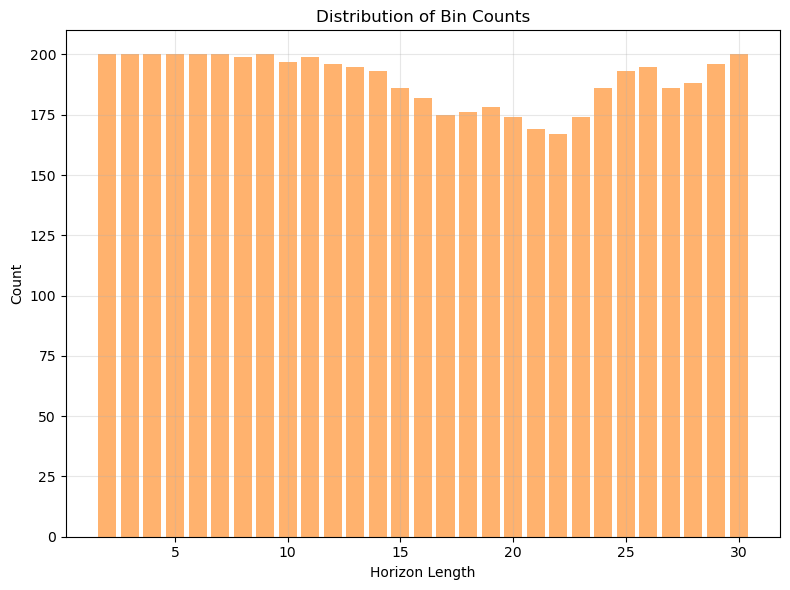

In [22]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(AHC_bin_centers, AHC_bin_counts, alpha=0.6, color='tab:orange')
ax1.set_xlabel('Horizon Length')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Bin Counts')
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
